In [1]:
from powerbispectrum import ComputePowerBiSpectrum
import powerbispectrum
import numpy as np
from matplotlib import pyplot as plt
powerbispectrum.__file__

'/home/rneveux/bispectrum/theory/powerbispectrum.py'

In [2]:
params_cosmo = {# fixed LambdaCDM parameters
                   'A_s':2.089e-9,
                   'n_s':0.9649,
                   'tau_reio':0.052,
                   'omega_b':0.02237,
                   'omega_cdm':0.12,
                   'h':0.6736,
                   'YHe':0.2425,
#                     'N_eff':3.046,
                    'N_ur':2.0328,
                    'N_ncdm':1,
                    'm_ncdm':0.06,
                   # other output and precision parameters
                    'output': 'tCl mPk','z_max_pk': 3.,
                    'P_k_max_h/Mpc': 100.,}

In [3]:
c=ComputePowerBiSpectrum(params_cosmo,.8)

In [5]:
c.initial_power_spectrum()

In [6]:
klin = np.linspace(.01,.3,30)

In [7]:
b1 = 2.0
b2 = -1
bG2 = .1
bGamma3 = -.1
Pshot = 5e3 # in units [Mpc/h]^3
c0 = 5. # in units [Mpc/h]^2
c1 = 15. # in units [Mpc/h]^2
c2 = -5. # in units [Mpc/h]^2
ch = 100 # in units [Mpc/h]^4

In [8]:
c.calc_P(
            klin, 0,
            alpha_perp=1, alpha_parallel=1, b1=b1, b2=b2, bG2=bG2, bGamma3=bGamma3,
            c0=c0, c1=c1, c2=c2, ch=ch, knl=.3,
            integrand='tree',
            ks=.05
        )
pk_lin = c.PK['K']
c.calc_P(
            klin, 0,
            alpha_perp=1, alpha_parallel=1, b1=b1, b2=b2, bG2=bG2, bGamma3=bGamma3,
            c0=c0, c1=c1, c2=c2, ch=ch, knl=.3,
            integrand='tree_for_1loop',
            ks=.05
        )
pk_lin_for_1loop = c.PK['K']

In [11]:
c.calc_P(
            klin, 0,
            alpha_perp=1, alpha_parallel=1, b1=b1, b2=b2, bG2=bG2, bGamma3=bGamma3,
            c0=c0, c1=c1, c2=c2, ch=ch, knl=.3,
            integrand='counterterm',
            ks=.05
        )
pk_ct = c.PK['K']

In [12]:
c.calc_P(
            klin, 0,
            alpha_perp=1, alpha_parallel=1, b1=b1, b2=b2, bG2=bG2, bGamma3=bGamma3,
            c0=c0, c1=c1, c2=c2, ch=ch, knl=.3,
            integrand='1loop',
            ks=.05
        )
pk_1loop = c.PK['K']

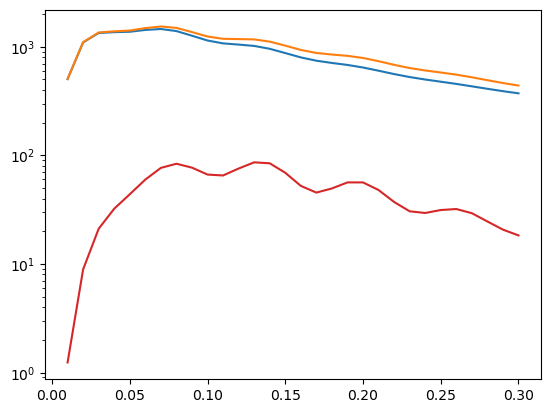

In [15]:
plt.plot(klin, klin*pk_lin)
plt.plot(klin, klin*pk_lin_for_1loop)
plt.plot(klin, klin*pk_ct)
plt.plot(klin, -klin*pk_1loop)
plt.yscale('log')